# "OCR" com LLMs

## O que esse código faz
- Extrai a tabela da imagem e converte em dataframe. 
- Ordenar o DataFrame pela coluna variacao em ordem crescente.  
- Iniciar um loop para alocar o orçamento para comprar lotes de 100 ações de cada tipo, seguindo a ordem do DataFrame ordenado.  
- Continuar o looping até que o orçamento seja insuficiente para qqr compra de lote.  

## Checklist

1. **Criação da chave de API**  

2. **Preparo da imagem**  

3. **Requisição à Vision API**

4. **Processar a resposta**

## Observações
- Modelo usado: `gpt-4-vision-preview` [Documentação Vision: https://platform.openai.com/docs/guides/vision](https://platform.openai.com/docs/guides/vision)
- Ele pode se comportar diferente do ChatGPT pois a OpenAI tem um sistema de mensagens que inserem automaticamente no backend.
- É o mesmo modelo que o GPT-4 Turbo, com a habilidade adicional de visão computacional.
- As imagens podem ser enviadas de 2 formas: link da imagem ou codificada em base64 diretamente na requisição.

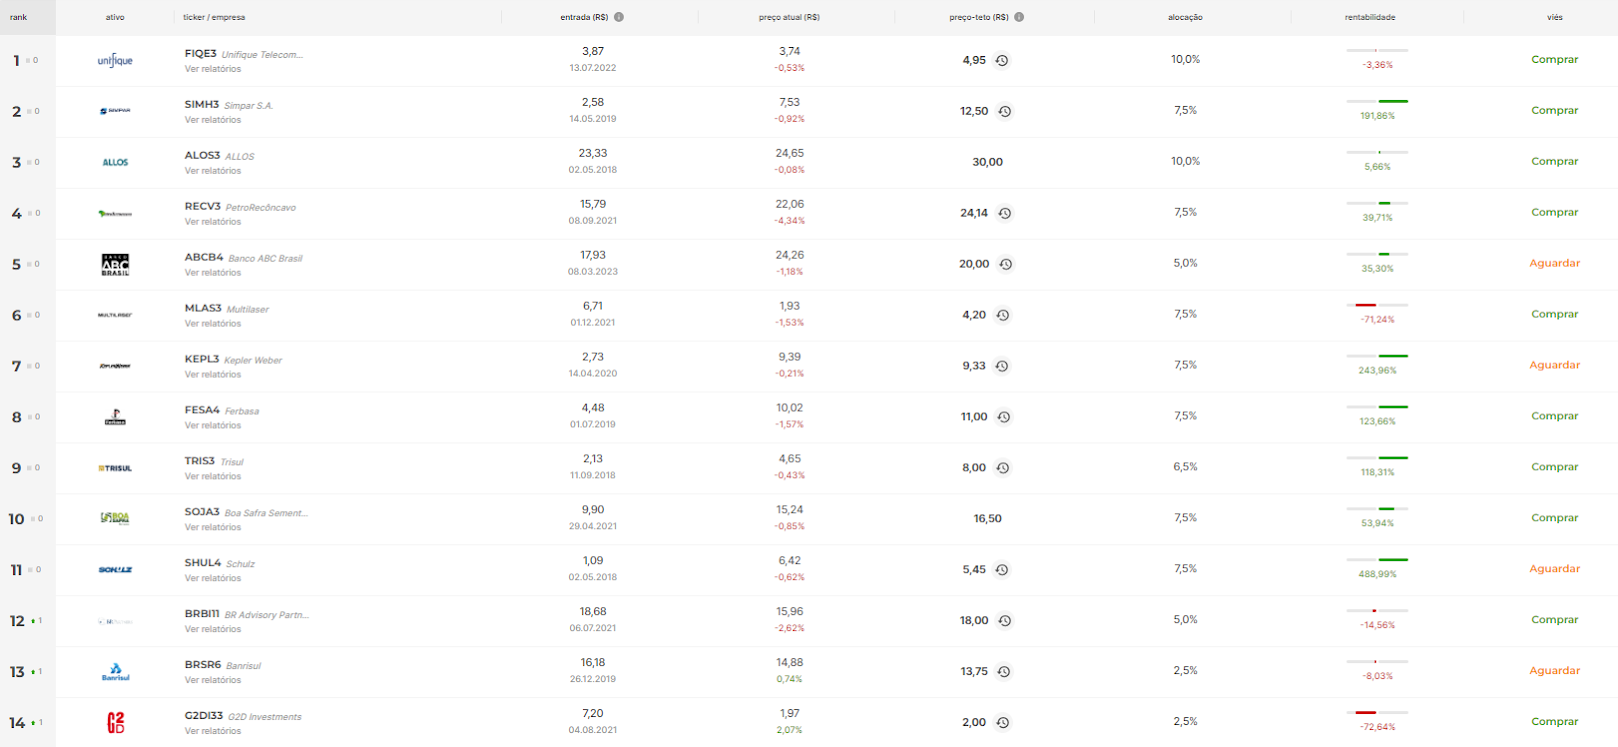

In [14]:
# amostra de imagem
from IPython.display import Image, display
display(Image(filename='SmalCaps.png'))

In [2]:
from dotenv import load_dotenv
from openai import OpenAI
from dotenv import load_dotenv
import base64
import os

load_dotenv(dotenv_path='.env')

api_key = os.getenv("OPENAI_API_KEY_VISAO")

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

image_path = "SmalCaps.png"

base64_image = encode_image(image_path)

client = OpenAI(api_key=api_key)

def passa_visao(instructions):
  response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
      {
        "role": "user",
        "content": [
          {"type": "text", "text": instructions},
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}",
              "detail": "high"
            },
          },
        ],
      }
    ],
    max_tokens=4000,
  )
  return response

In [3]:
# Com erro gramatical e com "You dont need to interpret, just list." 🤔
instructions = "I understand that you, as the advanced GPT-4 model with vision capabilities, are well-equipped for this task. Could you check the image for any stock-related information? Additionally, I would appreciate if you could organize the extracted data about the stocks into a JSON format. Need all 'Stock 1', 'Stock 2', 'Stock 3', 'Stock 4', 'Stock 5', 'Stock 6', 'Stock 7', 'Stock 8', 'Stock 9', 'Stock 10', 'Stock 11', 'Stock 12', 'Stock 13', 'Stock 14', etc. You dont need to interpret, just list. I suggest the following template for each stock  \"Stock 1\": {\"ticker\": \"FIGE3\",    \"entrada\": \"3.87\",    \"data_entrada\": \"13.07.2022\",    \"preco_atual\": \"3.74\",    \"variacao\": \"-0.53%\",    \"preco_teto\": \"4.95\",    \"alocacao\": \"10.0%\",    \"rentabilidade\": \"-3.36%\",    \"viés\": \"Comprar\"  }. Considerando que quanto menor o campo variação maior a oportunidade. Liste as que possuem o campo Viés igual a \"Comprar\". Your answer showld have only the main JSON, with the stocks. Do not add instroduction or end texts (like \"Based on the criteria described...\" or \"organized in the format you requested.\")."

complete_response = passa_visao(instructions)
print(complete_response.choices[0].message.content)

```json
{
  "Stock 1": {
    "ticker": "FIGE3",
    "entrada": "3.87",
    "data_entrada": "13.07.2022",
    "preco_atual": "3.74",
    "variacao": "-0.53%",
    "preco_teto": "4.95",
    "alocacao": "10.0%",
    "rentabilidade": "-3.36%",
    "viés": "Comprar"
  },
  "Stock 3": {
    "ticker": "ALSO3",
    "entrada": "23.33",
    "data_entrada": "02.05.2018",
    "preco_atual": "24.65",
    "variacao": "-0.08%",
    "preco_teto": "30.00",
    "alocacao": "10.0%",
    "rentabilidade": "5.66%",
    "viés": "Comprar"
  },
  "Stock 4": {
    "ticker": "RECV3",
    "entrada": "15.79",
    "data_entrada": "08.09.2021",
    "preco_atual": "22.06",
    "variacao": "-4.34%",
    "preco_teto": "24.14",
    "alocacao": "7.5%",
    "rentabilidade": "39.71%",
    "viés": "Comprar"
  },
  "Stock 6": {
    "ticker": "MLAS3",
    "entrada": "6.71",
    "data_entrada": "01.12.2021",
    "preco_atual": "1.93",
    "variacao": "-1.53%",
    "preco_teto": "4.20",
    "alocacao": "7.5%",
    "rentabilidad

In [16]:
import pandas as pd
import json  
json_str = complete_response.choices[0].message.content.replace("```json", "").replace("```", "").strip()
data_dict = json.loads(json_str)
data_list = list(data_dict.values())
df = pd.DataFrame(data_list)
print(df)

   ticker entrada data_entrada preco_atual variacao preco_teto alocacao  \
0   FIGE3    3.87   13.07.2022        3.74   -0.53%       4.95    10.0%   
1   ALSO3   23.33   02.05.2018       24.65   -0.08%      30.00    10.0%   
2   RECV3   15.79   08.09.2021       22.06   -4.34%      24.14     7.5%   
3   MLAS3    6.71   01.12.2021        1.93   -1.53%       4.20     7.5%   
4   FESA4    4.48   01.07.2019       10.02   -1.57%      11.00     7.5%   
5   TRIS3    2.13   11.09.2018        4.65   -0.43%       8.00     6.5%   
6   SOJA3    9.90   29.04.2021       15.24   -0.85%      16.50     7.5%   
7  BRBI11   18.68   06.07.2021       15.96   -2.62%      18.00     5.0%   
8   G2DT3    7.20   04.08.2021        1.97    2.07%       2.00     2.5%   

  rentabilidade     viés  
0        -3.36%  Comprar  
1         5.66%  Comprar  
2        39.71%  Comprar  
3       -71.24%  Comprar  
4       123.66%  Comprar  
5       118.31%  Comprar  
6        53.94%  Comprar  
7       -14.56%  Comprar  
8     

In [17]:
df_comprar = df[df["viés"] == "Comprar"]
print(df_comprar)

   ticker entrada data_entrada preco_atual variacao preco_teto alocacao  \
0   FIGE3    3.87   13.07.2022        3.74   -0.53%       4.95    10.0%   
1   ALSO3   23.33   02.05.2018       24.65   -0.08%      30.00    10.0%   
2   RECV3   15.79   08.09.2021       22.06   -4.34%      24.14     7.5%   
3   MLAS3    6.71   01.12.2021        1.93   -1.53%       4.20     7.5%   
4   FESA4    4.48   01.07.2019       10.02   -1.57%      11.00     7.5%   
5   TRIS3    2.13   11.09.2018        4.65   -0.43%       8.00     6.5%   
6   SOJA3    9.90   29.04.2021       15.24   -0.85%      16.50     7.5%   
7  BRBI11   18.68   06.07.2021       15.96   -2.62%      18.00     5.0%   
8   G2DT3    7.20   04.08.2021        1.97    2.07%       2.00     2.5%   

  rentabilidade     viés  
0        -3.36%  Comprar  
1         5.66%  Comprar  
2        39.71%  Comprar  
3       -71.24%  Comprar  
4       123.66%  Comprar  
5       118.31%  Comprar  
6        53.94%  Comprar  
7       -14.56%  Comprar  
8     

In [19]:
# preço atualiza... pra dps...🔚
import yfinance as yf

ticker = "FIQE3.SA"
stock = yf.Ticker(ticker)
hist = stock.history(period="1d")
print(hist['Close'].iloc[-1])

4.139999866485596


In [20]:
budget = 15000  # valor do orçamento para compra das ações 

df_comprar = df[df["viés"] == "Comprar"].copy()  
df_comprar['variacao'] = df_comprar['variacao'].str.replace('%', '').astype(float)
df_sorted = df_comprar.sort_values('variacao', ascending=True)
compras = {ticker: 0 for ticker in df_sorted['ticker']}
# Loop para alocar o orçamento em lotes de 100 ações
while budget > 0 and not df_sorted.empty:
    for ticker in df_sorted['ticker']:
        preco_pacote = 100 * float(df_sorted.loc[df_sorted['ticker'] == ticker, 'preco_atual'].iloc[0])
        if budget >= preco_pacote:
            budget -= preco_pacote  
            compras[ticker] += 1  
        else:
            df_sorted = df_sorted[df_sorted['ticker'] != ticker]  # eita, essa não dá mais

for ticker, pacotes in compras.items():
    df_comprar.loc[df_comprar['ticker'] == ticker, 'lotes_comprados'] = pacotes

print(df_comprar)
print("Budget restante:", budget)

   ticker entrada data_entrada preco_atual  variacao preco_teto alocacao  \
0   FIGE3    3.87   13.07.2022        3.74     -0.53       4.95    10.0%   
1   ALSO3   23.33   02.05.2018       24.65     -0.08      30.00    10.0%   
2   RECV3   15.79   08.09.2021       22.06     -4.34      24.14     7.5%   
3   MLAS3    6.71   01.12.2021        1.93     -1.53       4.20     7.5%   
4   FESA4    4.48   01.07.2019       10.02     -1.57      11.00     7.5%   
5   TRIS3    2.13   11.09.2018        4.65     -0.43       8.00     6.5%   
6   SOJA3    9.90   29.04.2021       15.24     -0.85      16.50     7.5%   
7  BRBI11   18.68   06.07.2021       15.96     -2.62      18.00     5.0%   
8   G2DT3    7.20   04.08.2021        1.97      2.07       2.00     2.5%   

  rentabilidade     viés  lotes_comprados  
0        -3.36%  Comprar              1.0  
1         5.66%  Comprar              1.0  
2        39.71%  Comprar              2.0  
3       -71.24%  Comprar              1.0  
4       123.66%  Co